In [297]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

import scipy.stats as stats

from warnings import filterwarnings
filterwarnings("ignore")

In [193]:
df = pd.read_csv("cubic_zirconia.csv")
new = df.drop("Unnamed: 0" , axis=1)

In [194]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [195]:
new.head(10)

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779
5,1.02,Ideal,D,VS2,61.5,56.0,6.46,6.49,3.99,9502
6,1.01,Good,H,SI1,63.7,60.0,6.35,6.30,4.03,4836
7,0.50,Premium,E,SI1,61.5,62.0,5.09,5.06,3.12,1415
8,1.21,Good,H,SI1,63.8,64.0,6.72,6.63,4.26,5407
9,0.35,Ideal,F,VS2,60.5,57.0,4.52,4.60,2.76,706


In [196]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  26967 non-null  int64  
 1   carat       26967 non-null  float64
 2   cut         26967 non-null  object 
 3   color       26967 non-null  object 
 4   clarity     26967 non-null  object 
 5   depth       26270 non-null  float64
 6   table       26967 non-null  float64
 7   x           26967 non-null  float64
 8   y           26967 non-null  float64
 9   z           26967 non-null  float64
 10  price       26967 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 2.3+ MB


In [197]:
new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26967 non-null  float64
 1   cut      26967 non-null  object 
 2   color    26967 non-null  object 
 3   clarity  26967 non-null  object 
 4   depth    26270 non-null  float64
 5   table    26967 non-null  float64
 6   x        26967 non-null  float64
 7   y        26967 non-null  float64
 8   z        26967 non-null  float64
 9   price    26967 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 2.1+ MB


In [198]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,26967.0,NaN,NaN,NaN,13484.0,7784.846691,1.0,6742.5,13484.0,20225.5,26967.0
carat,26967.0,NaN,NaN,NaN,0.798375,0.477745,0.2,0.4,0.7,1.05,4.5
cut,26967,5,Ideal,10816,NaN,NaN,NaN,NaN,NaN,NaN,NaN
color,26967,7,G,5661,NaN,NaN,NaN,NaN,NaN,NaN,NaN
clarity,26967,8,SI1,6571,NaN,NaN,NaN,NaN,NaN,NaN,NaN
depth,26270.0,NaN,NaN,NaN,61.745147,1.41286,50.8,61.0,61.8,62.5,73.6
table,26967.0,NaN,NaN,NaN,57.45608,2.232068,49.0,56.0,57.0,59.0,79.0
x,26967.0,NaN,NaN,NaN,5.729854,1.128516,0.0,4.71,5.69,6.55,10.23
y,26967.0,NaN,NaN,NaN,5.733569,1.166058,0.0,4.71,5.71,6.54,58.9
z,26967.0,NaN,NaN,NaN,3.538057,0.720624,0.0,2.9,3.52,4.04,31.8


In [199]:
new.describe()

,carat,depth,table,x,y,z,price
count,26967.000000,26270.000000,26967.000000,26967.000000,26967.000000,26967.000000,26967.000000
mean,0.798375,61.745147,57.456080,5.729854,5.733569,3.538057,3939.518115
std,0.477745,1.412860,2.232068,1.128516,1.166058,0.720624,4024.864666
min,0.200000,50.800000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,61.000000,56.000000,4.710000,4.710000,2.900000,945.000000
50%,0.700000,61.800000,57.000000,5.690000,5.710000,3.520000,2375.000000
75%,1.050000,62.500000,59.000000,6.550000,6.540000,4.040000,5360.000000
max,4.500000,73.600000,79.000000,10.230000,58.900000,31.800000,18818.000000


In [200]:
df.isnull().sum()

Unnamed: 0      0
carat           0
cut             0
color           0
clarity         0
depth         697
table           0
x               0
y               0
z               0
price           0
dtype: int64

In [201]:
df.duplicated().sum()

0

In [202]:
df.shape

(26967, 11)

In [203]:
df.drop_duplicates(inplace=True)

In [204]:
df.shape

(26967, 11)

In [205]:
df.select_dtypes(include='object').head()

,cut,color,clarity
0,Ideal,E,SI1
1,Premium,G,IF
2,Very Good,E,VVS2
3,Ideal,F,VS1
4,Ideal,F,VVS1


In [206]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


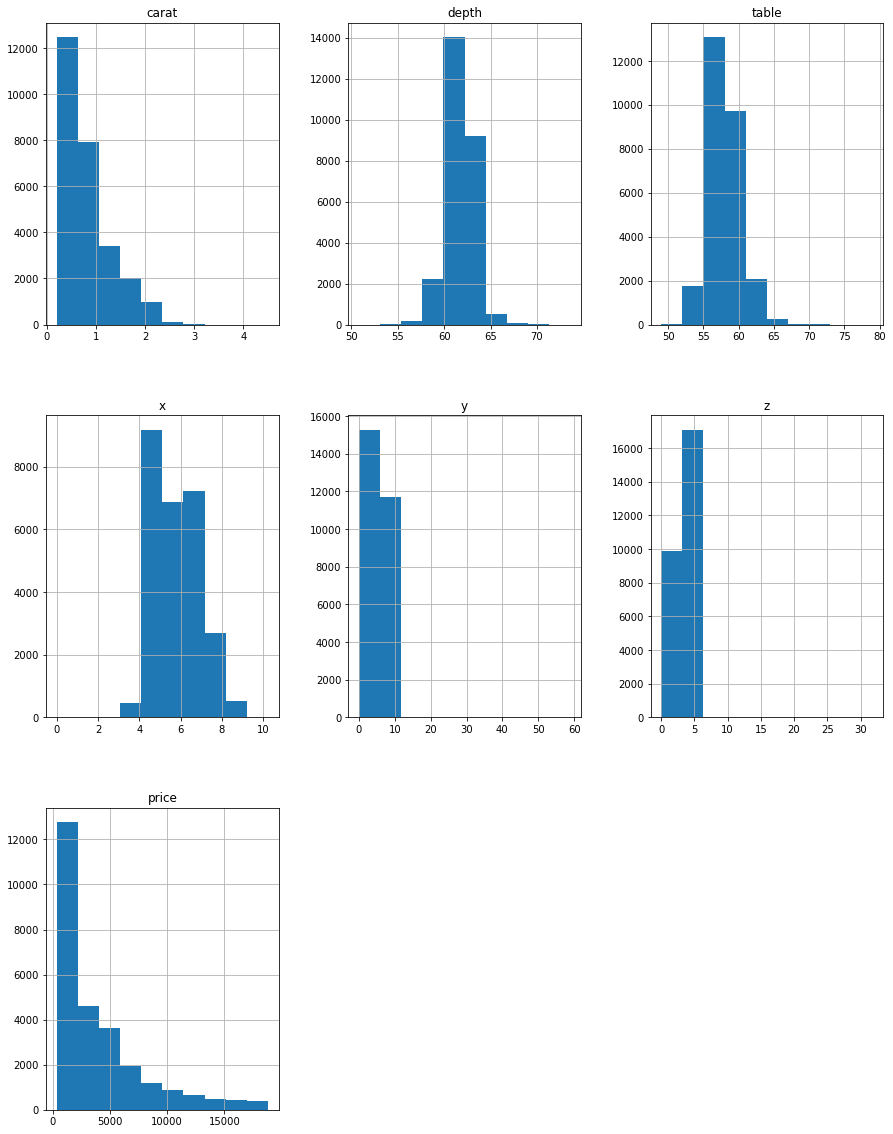

In [307]:
new.hist(figsize=(15,20));

In [308]:
new.depth.fillna((new.depth.median()),inplace=True)

In [309]:
# Measure the skeweness of the required columns
Skewness = pd.DataFrame({'Skewness' : [stats.skew(new.carat),stats.skew(new.depth),
                                       stats.skew(new.table),stats.skew(new.x),
                                       stats.skew(new.y),stats.skew(new.z)]},
                        index=["carat", "depth", "table", "x", "y", "z"])  

Skewness

,Skewness
carat,1.116419
depth,-0.032040
table,0.765716
x,0.387964
y,3.849975
z,2.568114


In [209]:
df.columns

Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x',
       'y', 'z', 'price'],
      dtype='object')

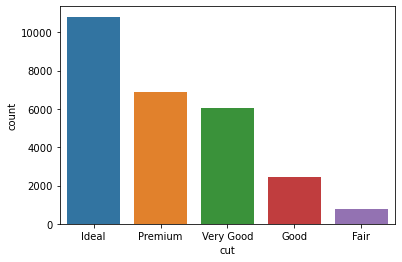

In [210]:
sns.countplot(df['cut']);

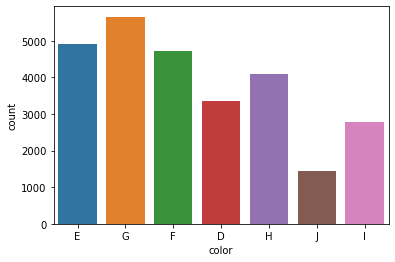

In [211]:
sns.countplot(df['color']);

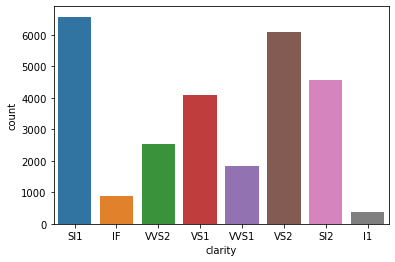

In [212]:
sns.countplot(df['clarity']);

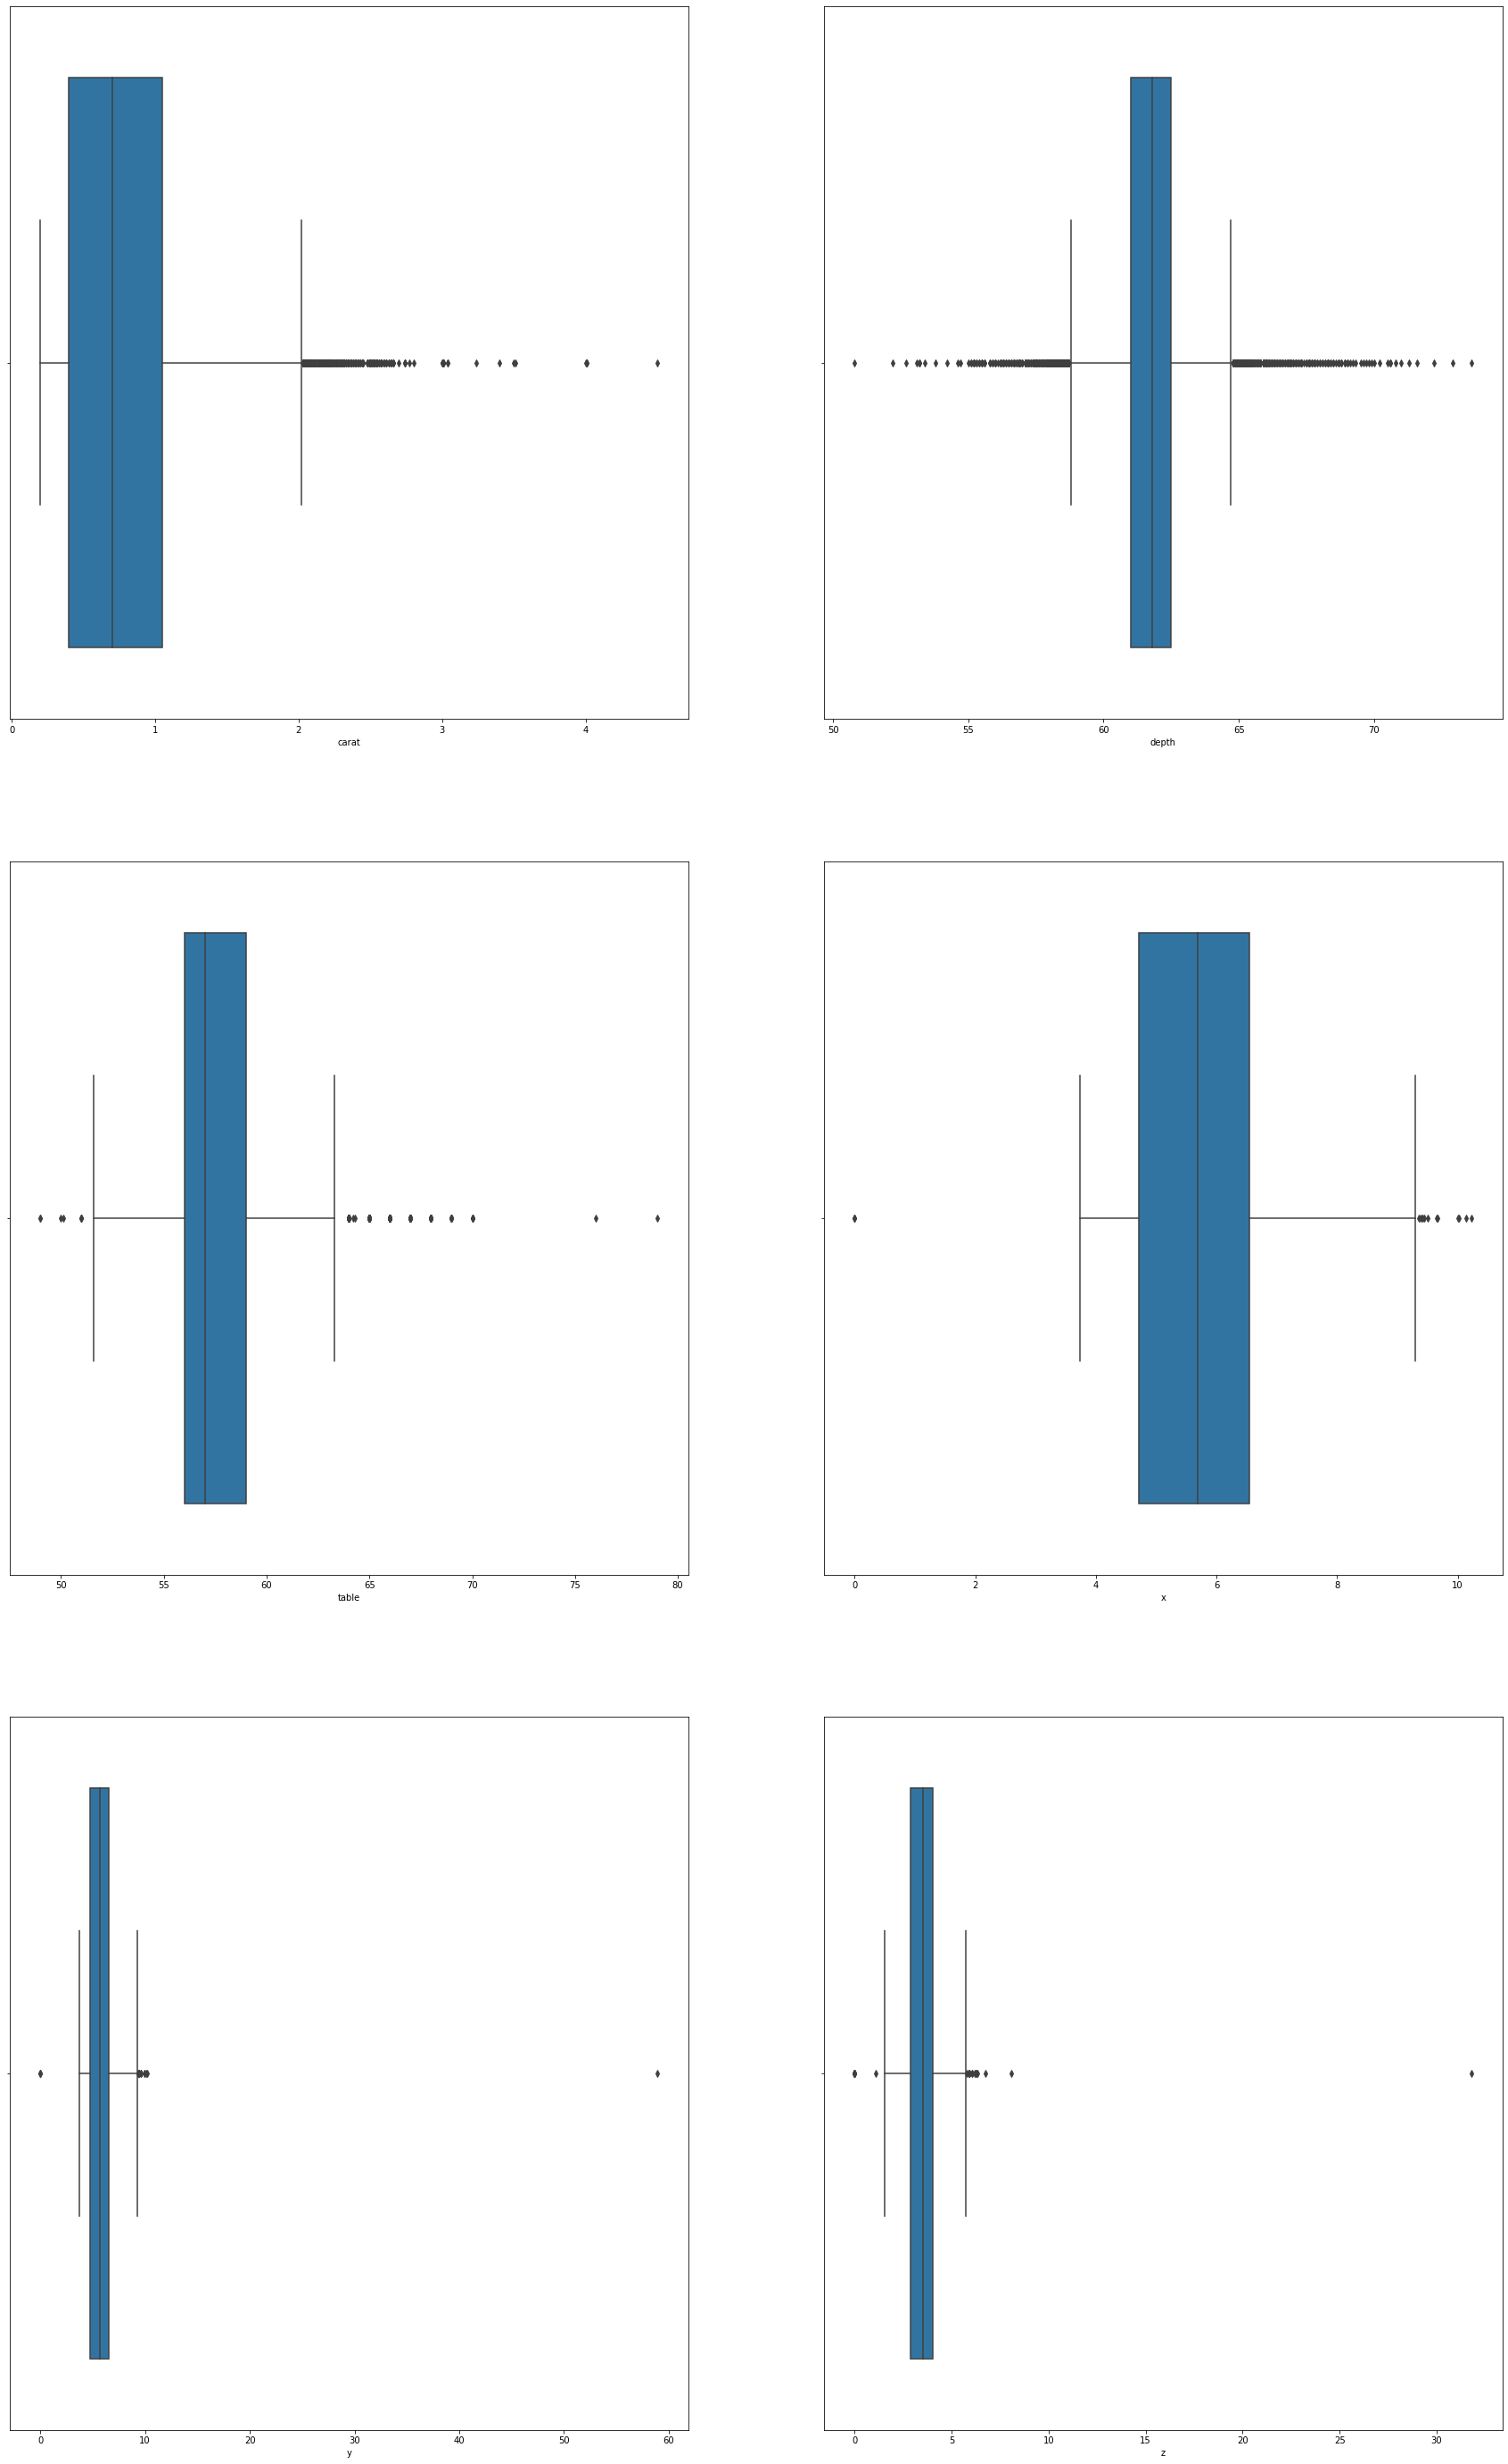

In [213]:
plt.figure(figsize=(30,50))

My_coulmns = ["carat", "depth", "table", "x", "y", "z"]
for i in range(0,6):
    plt.subplot(3,2,i+1)
    sns.boxplot(df[My_coulmns[i]])

<AxesSubplot:>

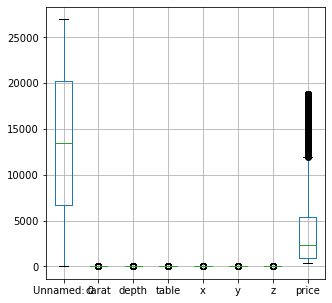

In [214]:
df.boxplot(figsize=(5,5))

In [215]:
##Treating outliers

def treat_outlier(col):
    sorted(col)
    Q1,Q3 = np.percentile(col,[25,75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5*IQR)
    upper_range = Q3 + (1.5*IQR)
    
    return lower_range,upper_range

In [216]:
for column in df.drop(['cut','clarity','color'],axis=1):
    lr, ur = treat_outlier(df[column])
    df[column] = np.where(df[column]>ur,ur,df[column])
    df[column] = np.where(df[column]<lr,lr,df[column])

In [217]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

In [218]:
dft = df[~((df<(Q1 - 1.5 * IQR))|(df>(Q3 + 1.5 * IQR))).any(axis=1)]
print("Shape of data with outlier treatment",dft.shape)
print("Shape of data without outlier treatment",df.shape)

Shape of data with outlier treatment (25742, 11)
Shape of data without outlier treatment (26967, 11)


<AxesSubplot:>

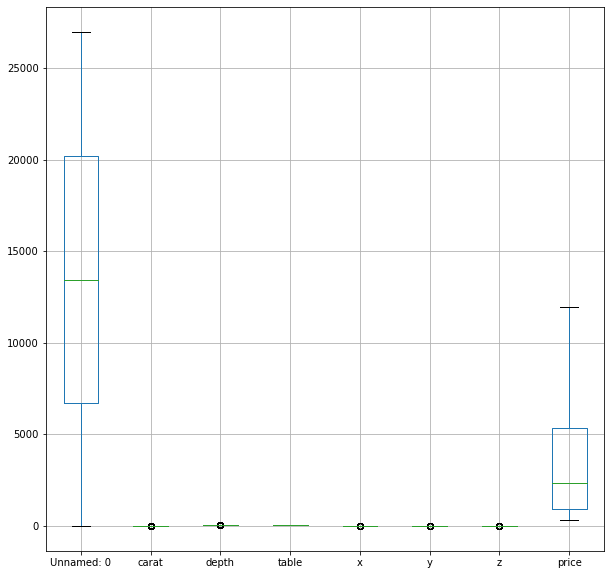

In [219]:
dft.boxplot(figsize = (10,10))

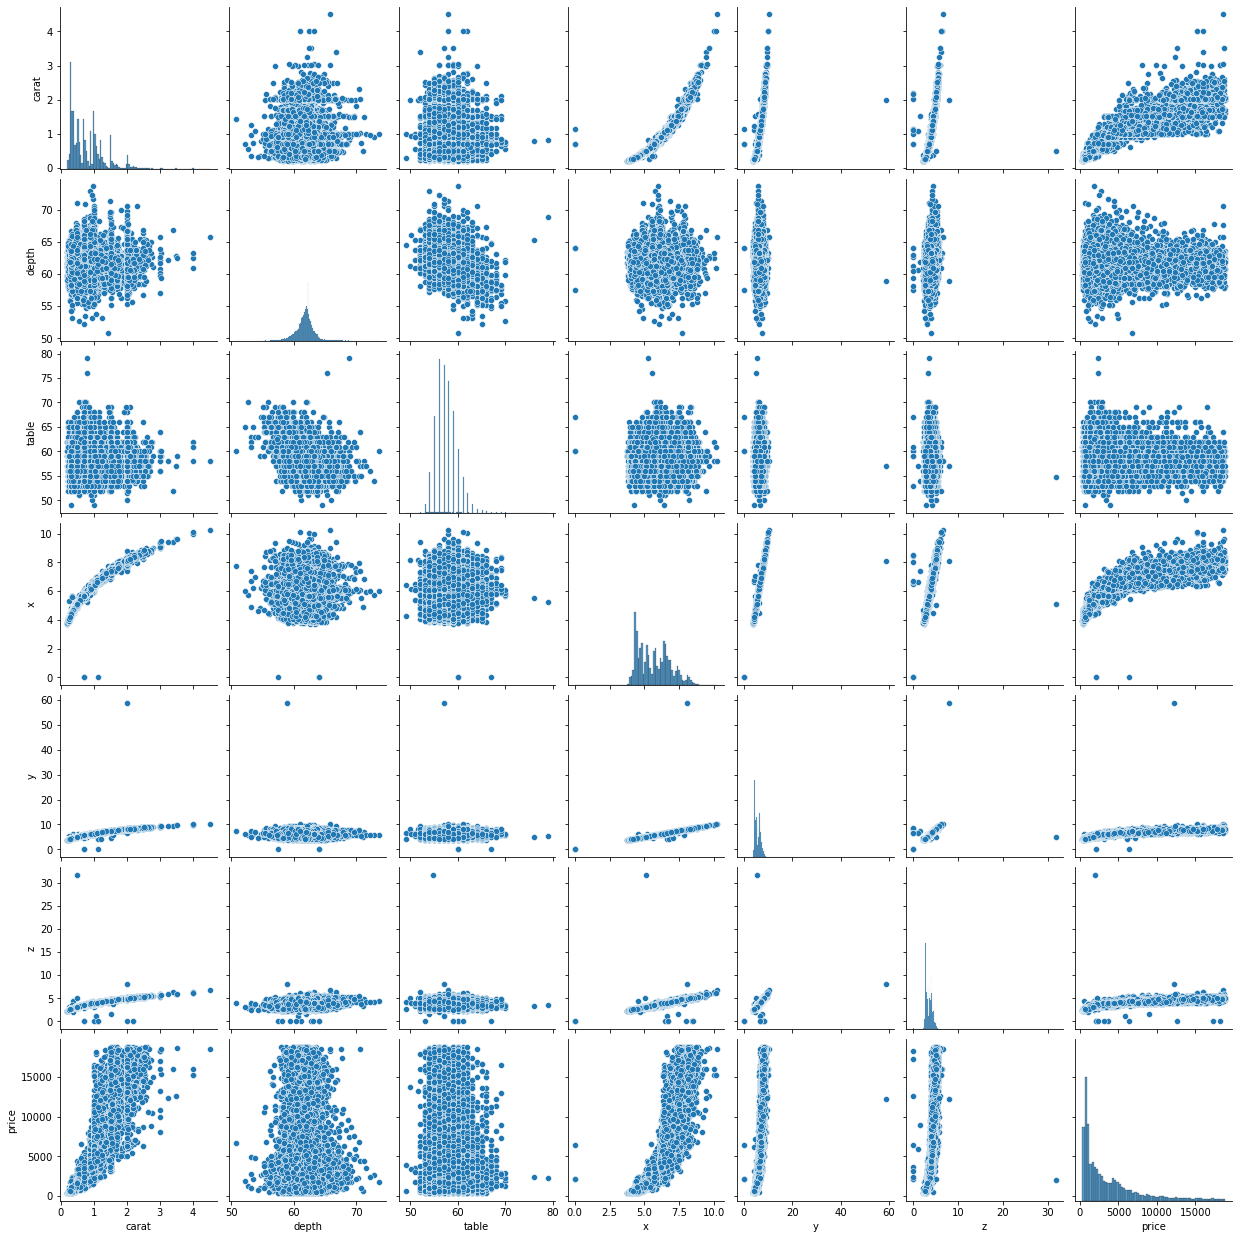

In [220]:
sns.pairplot(data=new)
plt.show()

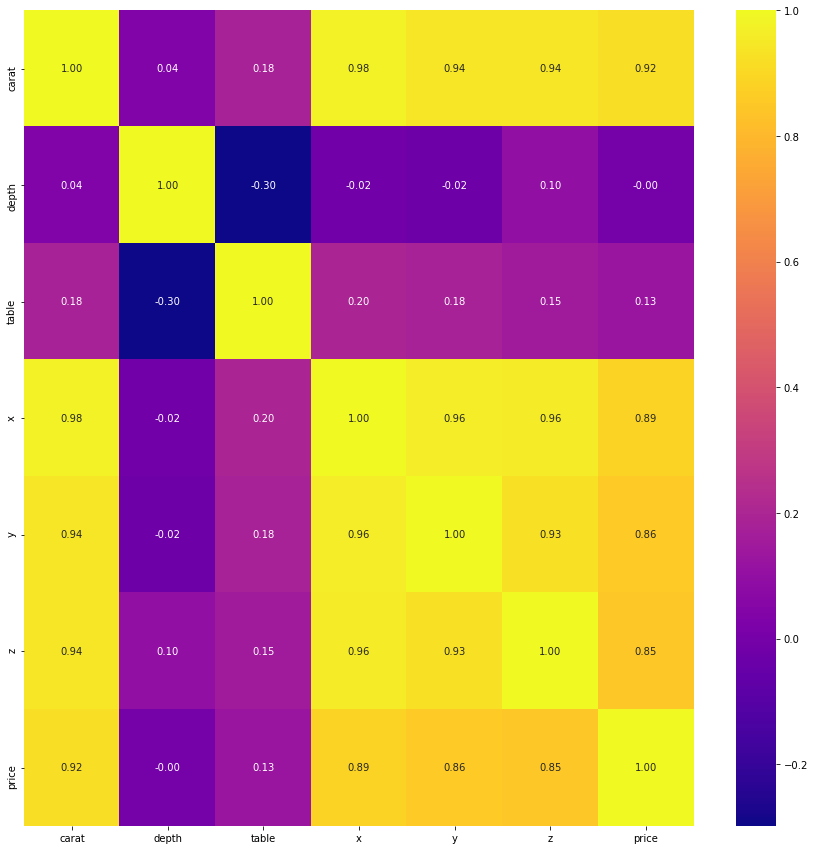

In [229]:
plt.figure(figsize=(15,15))
sns.heatmap(new.corr(),annot=True,fmt=".2f", cmap='plasma');

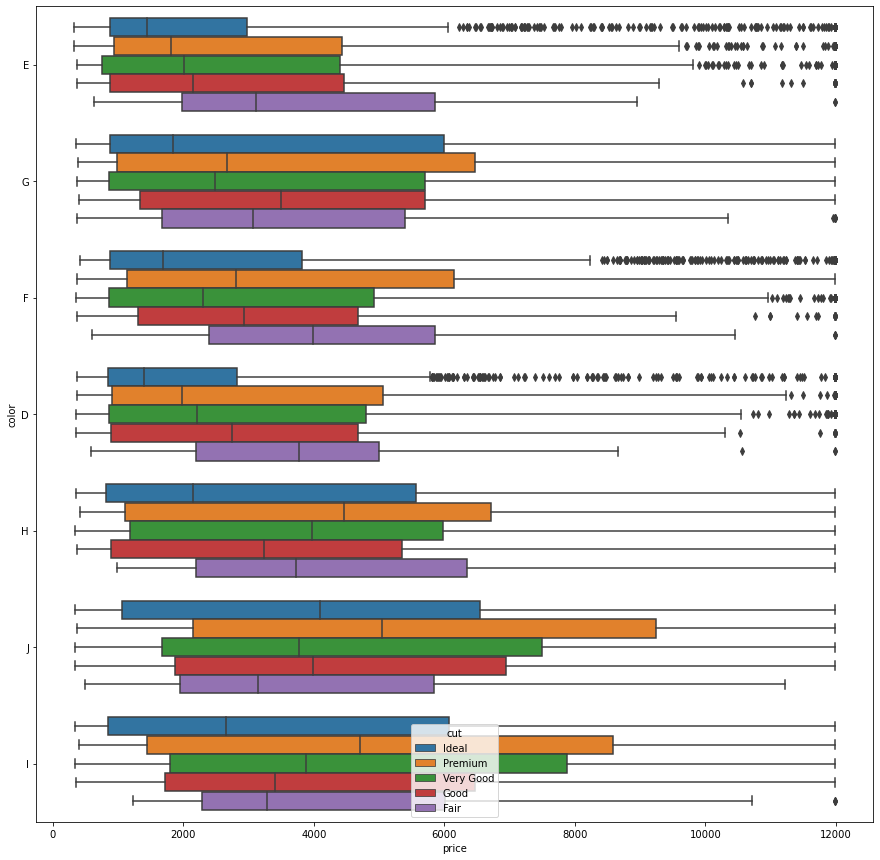

In [230]:
plt.figure(figsize=(15,15))
sns.boxplot(df['price'], df['color'], hue=df['cut']);

In [231]:
df = dft.copy()

In [232]:
df.shape

(25742, 11)

In [233]:
df.depth.fillna((df.depth.median()),inplace=True)

In [234]:
df.isnull().sum().sum()

0

In [238]:
df = df.drop('Unnamed: 0',axis=1)

In [239]:
df = df.drop('x',axis=1)

In [240]:
df = df.drop('y',axis=1)

In [241]:
df = df.drop('z',axis=1)

In [242]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,25742.0,0.785202,0.460513,0.2,0.39,0.7,1.04,2.025
depth,25742.0,61.777344,1.091666,58.8,61.10,61.9,62.50,64.700
table,25742.0,57.342324,2.083422,51.5,56.00,57.0,59.00,63.500
price,25742.0,3714.697382,3478.048431,326.0,928.00,2328.0,5357.50,11982.500


In [289]:
df.head()

,carat,cut,color,clarity,depth,table,price
0,0.30,4,5,2,62.1,58.0,499.0
1,0.33,3,3,7,60.8,58.0,984.0
2,0.90,2,5,5,62.2,60.0,6289.0
3,0.42,4,4,4,61.6,56.0,1082.0
4,0.31,4,4,6,60.4,59.0,779.0


In [244]:
a = df.cut.unique()
a.sort()
a

array(['Fair', 'Good', 'Ideal', 'Premium', 'Very Good'], dtype=object)

In [245]:
df.cut = np.where(df.cut == 'Fair','0',df.cut)
df.cut = np.where(df.cut == 'Good','1',df.cut)
df.cut = np.where(df.cut == 'Very Good','2',df.cut)
df.cut = np.where(df.cut == 'Premium','3',df.cut)
df.cut = np.where(df.cut == 'Ideal','4',df.cut)

In [246]:
a = df.color.unique()
a.sort()
a

array(['D', 'E', 'F', 'G', 'H', 'I', 'J'], dtype=object)

In [247]:
df.color = np.where(df.color == 'J','0',df.color)
df.color = np.where(df.color == 'I','1',df.color)
df.color = np.where(df.color == 'H','2',df.color)
df.color = np.where(df.color == 'G','3',df.color)
df.color = np.where(df.color == 'F','4',df.color)
df.color = np.where(df.color == 'E','5',df.color)
df.color = np.where(df.color == 'D','6',df.color)

In [248]:
a = df.clarity.unique()
a.sort()
a

array(['I1', 'IF', 'SI1', 'SI2', 'VS1', 'VS2', 'VVS1', 'VVS2'],
      dtype=object)

In [249]:
df.clarity = np.where(df.clarity == 'I1','0',df.clarity)
df.clarity = np.where(df.clarity == 'SI2','1',df.clarity)
df.clarity = np.where(df.clarity == 'SI1','2',df.clarity)
df.clarity = np.where(df.clarity == 'VS2','3',df.clarity)
df.clarity = np.where(df.clarity == 'VS1','4',df.clarity)
df.clarity = np.where(df.clarity == 'VVS2','5',df.clarity)
df.clarity = np.where(df.clarity == 'VVS1','6',df.clarity)
df.clarity = np.where(df.clarity == 'IF','7',df.clarity)

In [250]:
df.cut = df.cut.astype(int)

In [251]:
df.color = df.color.astype(int)

In [252]:
df.clarity = df.clarity.astype(int)

In [253]:
df.head()

,carat,cut,color,clarity,depth,table,price
0,0.30,4,5,2,62.1,58.0,499.0
1,0.33,3,3,7,60.8,58.0,984.0
2,0.90,2,5,5,62.2,60.0,6289.0
3,0.42,4,4,4,61.6,56.0,1082.0
4,0.31,4,4,6,60.4,59.0,779.0


In [254]:
df.nunique()

carat       182
cut           5
color         7
clarity       8
depth        60
table        98
price      7137
dtype: int64

In [255]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,25742.0,0.785202,0.460513,0.2,0.39,0.7,1.04,2.025
cut,25742.0,2.998252,1.030647,0.0,2.00,3.0,4.00,4.000
color,25742.0,3.398609,1.703052,0.0,2.00,3.0,5.00,6.000
clarity,25742.0,3.084220,1.643696,0.0,2.00,3.0,4.00,7.000
depth,25742.0,61.777344,1.091666,58.8,61.10,61.9,62.50,64.700
table,25742.0,57.342324,2.083422,51.5,56.00,57.0,59.00,63.500
price,25742.0,3714.697382,3478.048431,326.0,928.00,2328.0,5357.50,11982.500


In [256]:
df.dtypes

carat      float64
cut          int64
color        int64
clarity      int64
depth      float64
table      float64
price      float64
dtype: object

In [257]:
df [df.isnull().any(axis=1)]

,carat,cut,color,clarity,depth,table,price


In [258]:
#Declare the independent and dependent variables

X = df.drop('price', axis=1)

y = df[['price']]


In [259]:
from sklearn.model_selection import train_test_split

In [260]:
# Split X and y into training and test set in 70:30 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [261]:
# invoke the LinearRegression function and find the bestfit model on training data

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [262]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for carat is 7985.6409724891
The coefficient for cut is 55.552706098980366
The coefficient for color is 274.69970790285635
The coefficient for clarity is 444.92789769875435
The coefficient for depth is -24.245502349583333
The coefficient for table is -28.41108497582269


In [263]:
# Let us check the intercept for the model

intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is -1905.45765795932


In [264]:

regression_model.score(X_train, y_train)

0.9322660677114132

In [294]:
# Model score - R2 or coeff of determinant
# R^2=1–RSS / TSS =  RegErr / TSS

regression_model.score(X_test, y_test)

-1.108782775182577

In [298]:
#RMSE on Training data
predicted_train=regression_model.fit(X_train, y_train).predict(X_train)
np.sqrt(metrics.mean_squared_error(y_train,predicted_train))

905.4332671439

In [299]:
#RMSE on Testing data
predicted_test=regression_model.fit(X_train, y_train).predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test,predicted_test))

906.4573329601515

In [266]:
# R^2 is not a reliable metric as it always increases with addition of more attributes even if the attributes have no 
# influence on the predicted variable. Instead we use adjusted R^2 which removes the statistical chance that improves R^2
# Scikit does not provide a facility for adjusted R^2... so we use 
# statsmodel, a library that gives results similar to
# what you obtain in R language
# This library expects the X and Y to be given in one single dataframe

data_train = pd.concat([X_train, y_train], axis=1)
data_train.head()


,carat,cut,color,clarity,depth,table,price
3097,1.12,2,3,0,61.2,63.0,3017.0
15419,0.80,2,1,2,61.9,56.0,2473.0
25397,1.71,4,0,4,61.6,57.0,10821.0
5825,0.30,3,3,4,62.9,58.0,776.0
24091,0.30,3,4,7,61.6,58.0,947.0


In [268]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= 'price ~ carat+cut+color+clarity+depth+table', data = data_train).fit()
lm1.params

Intercept   -1905.457658
carat        7985.640972
cut            55.552706
color         274.699708
clarity       444.927898
depth         -24.245502
table         -28.411085
dtype: float64

In [269]:
print(lm1.summary())  #Inferential statistics

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                 4.132e+04
Date:                Sat, 28 Aug 2021   Prob (F-statistic):               0.00
Time:                        18:44:54   Log-Likelihood:            -1.4825e+05
No. Observations:               18019   AIC:                         2.965e+05
Df Residuals:                   18012   BIC:                         2.966e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1905.4577    576.406     -3.306      0.0

In [270]:
# Let us check the sum of squared errors by predicting value of y for test cases and 
# subtracting from the actual y for the test cases

mse = np.mean((regression_model.predict(X_test)-y_test)**2)

In [271]:
# underroot of mean_sq_error is standard deviation i.e. avg variance between predicted and actual

import math

math.sqrt(mse)

906.457332960153

In [272]:
# Model score - R2 or coeff of determinant
# R^2=1–RSS / TSS

regression_model.score(X_test, y_test)

0.931957072360339

In [273]:
# predict mileage (mpg) for a set of attributes not in the training or test set
y_pred = regression_model.predict(X_test)

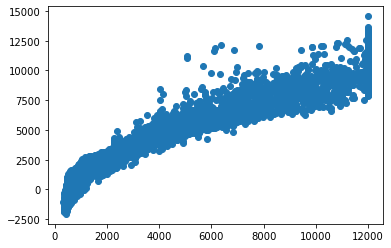

In [274]:
# Since this is regression, plot the predicted y value vs actual y values for the test data
# A good model's prediction will be close to actual leading to high R and R2 values

plt.scatter(y_test['price'], y_pred)



In [275]:
# How do we improve the model? the R^2 is .844, how do we improve it
# The indpendent attributes have different units and scales of measurement 
# It is always a good practice to scale all the dimensions using z scores or someother methode to address the problem of different scales 


In [276]:
from scipy.stats import zscore

X_train_scaled  = X_train.apply(zscore)
X_test_scaled = X_test.apply(zscore)
y_train_scaled = y_train.apply(zscore)
y_test_scaled = y_test.apply(zscore)


In [277]:
# invoke the LinearRegression function and find the bestfit model on training data

regression_model = LinearRegression()
regression_model.fit(X_train_scaled, y_train_scaled)

LinearRegression()

In [278]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for carat is 1.058710108211454
The coefficient for cut is 0.01650516906957958
The coefficient for color is 0.13474008221822464
The coefficient for clarity is 0.20981271552482117
The coefficient for depth is -0.0076629408758272614
The coefficient for table is -0.01695206579151414


In [279]:
intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is -1.1052488343132788e-16


In [303]:
# Model score - R2 or coeff of determinant
# R^2=1–RSS / TSS

regression_model.score(X_test_scaled, y_test_scaled)

0.9319541071286874

In [304]:
regression_model.score(X_train_scaled, y_train_scaled)

0.9322660677114132

In [281]:
# Let us check the sum of squared errors by predicting value of y for training cases and 
# subtracting from the actual y for the training cases

mse = np.mean((regression_model.predict(X_test_scaled)-y_test_scaled)**2)

In [300]:
# underroot of mean_sq_error is standard deviation i.e. avg variance between predicted and actual

import math

math.sqrt(mse)

0.2608560769300051

In [301]:
#RMSE on Training data
predicted_train=regression_model.fit(X_train_scaled, y_train_scaled).predict(X_train_scaled)
np.sqrt(metrics.mean_squared_error(y_train_scaled,predicted_train))

0.2602574346461341

In [302]:
#RMSE on Testing data
predicted_test=regression_model.fit(X_train_scaled, y_train_scaled).predict(X_test_scaled)
np.sqrt(metrics.mean_squared_error(y_test_scaled,predicted_test))

0.26085607693000473

In [283]:
# predict mileage (mpg) for a set of attributes not in the training or test set
y_pred = regression_model.predict(X_test_scaled)

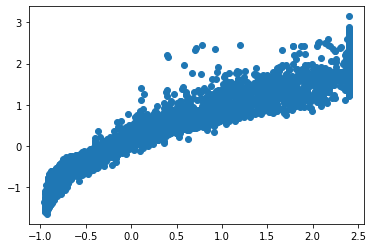

In [284]:
# Since this is regression, plot the predicted y value vs actual y values for the test data
# A good model's prediction will be close to actual leading to high R and R2 values
plt.scatter(y_test_scaled['price'], y_pred)

In [285]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [286]:
vif = [variance_inflation_factor(X.values, ix) for ix in range(X.shape[1])] 

In [287]:
i=0
for column in X.columns:
    if i < 11:
        print (column ,"--->",  vif[i])
        i = i+1



carat ---> 5.063098522618652
cut ---> 10.005831322701823
color ---> 5.536356458389349
clarity ---> 5.326134545167012
depth ---> 592.7757130470161
table ---> 559.3255368133664
